In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('forex.csv', index_col=['date'], parse_dates=['date'], dayfirst=True)
columns_list = df.columns
df

,open,high,low,close,volume
date,,,,,
2011-03-29,1.40860,1.41480,1.40470,1.41130,64044
2011-03-30,1.41130,1.41460,1.40520,1.41260,70281
2011-03-31,1.41270,1.42320,1.41160,1.41740,73492
2011-04-01,1.41730,1.42450,1.40610,1.42340,70943
2011-04-04,1.42310,1.42680,1.41920,1.42180,61094
...,...,...,...,...,...
2019-02-11,1.13181,1.13293,1.12666,1.12746,42001
2019-02-12,1.12740,1.13389,1.12569,1.13241,43338
2019-02-13,1.13231,1.13407,1.12592,1.12592,45751


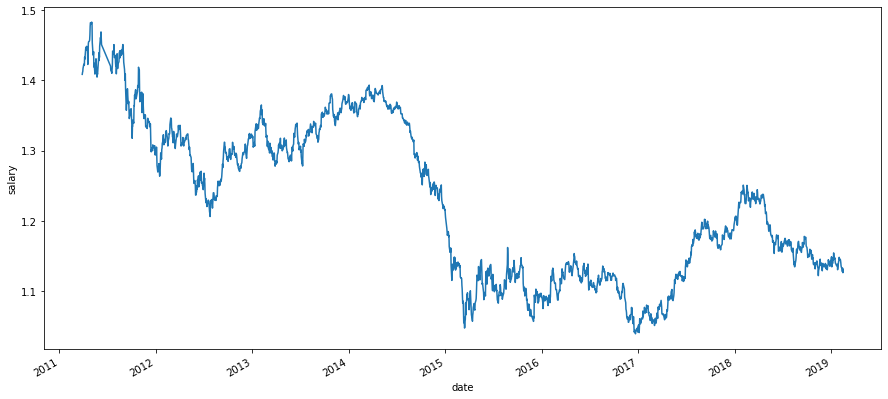

In [3]:
plt.figure(figsize(15,7))
df['open'].plot() 
plt.ylabel('salary')
pylab.show()

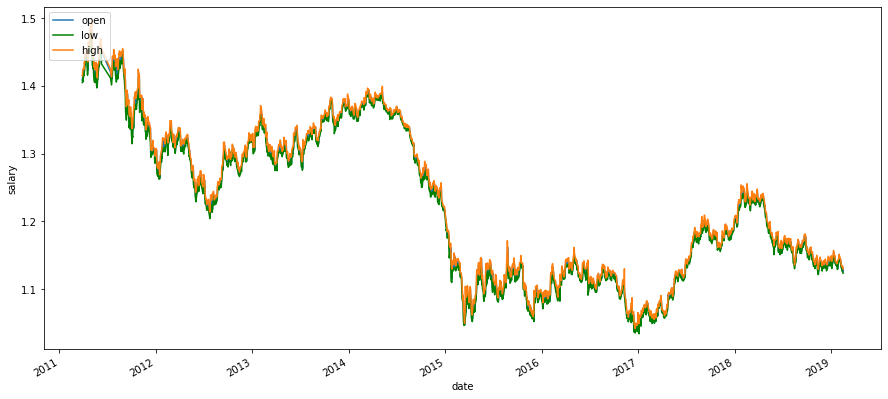

In [4]:
plt.figure(figsize(15,7))
df.open.plot()
df.low.plot(color='g')
df.high.plot()
plt.ylabel('price')
plt.legend(loc='upper left')
pylab.show()

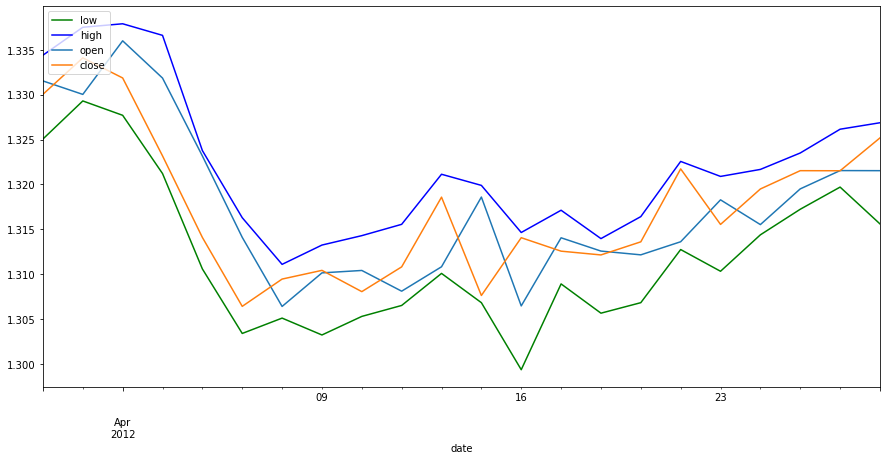

In [5]:
plt.figure(figsize(15,7))
df.loc['2012-03-29':'2012-04-29'].low.plot(color='g')
df.loc['2012-03-29':'2012-04-29'].high.plot(color='b')
df.loc['2012-03-29':'2012-04-29'].open.plot()
df.loc['2012-03-29':'2012-04-29'].close.plot()
plt.legend(loc='upper left')

## анализ ряда

In [6]:
df2 = pd.DataFrame(index=df.index[0:6])#, index_col=['date']) #, parse_dates=['date'])
df2['open']=df['open']
df2

,open
date,
2011-03-29,1.4086
2011-03-30,1.4113
2011-03-31,1.4127
2011-04-01,1.4173
2011-04-04,1.4231
2011-04-05,1.4218


Критерий Дики-Фуллера: p=0.428324


<Figure size 1080x720 with 0 Axes>

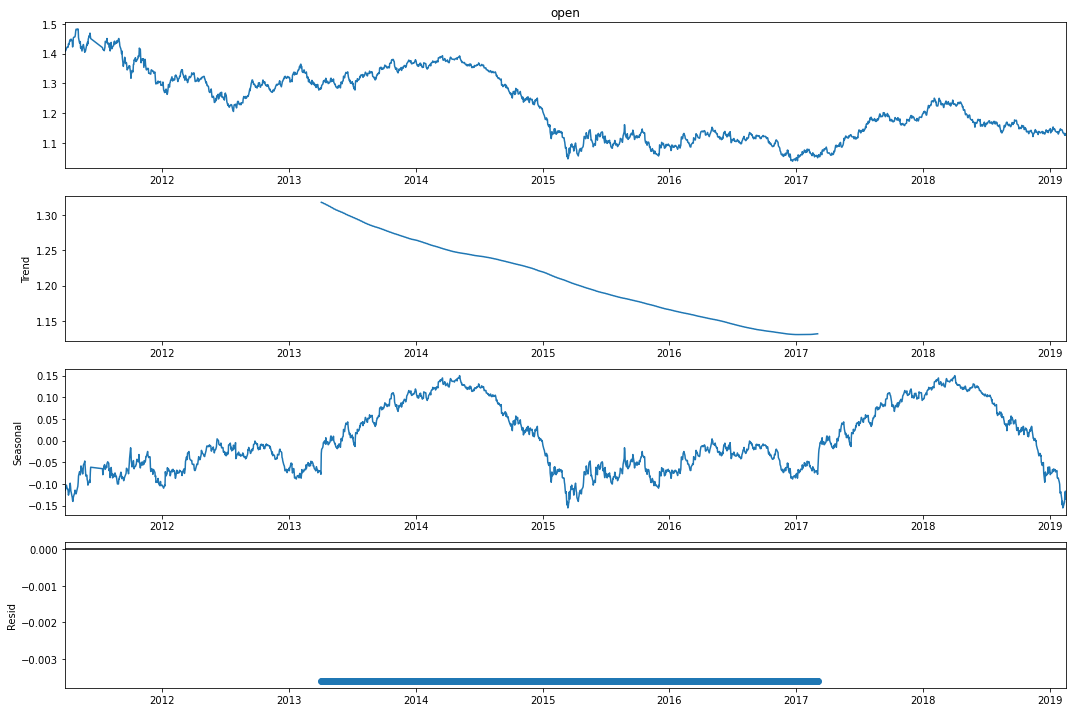

In [7]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df.open,  period = 1024).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.open)[1])

### Диффиренцирование

<Figure size 1080x720 with 0 Axes>

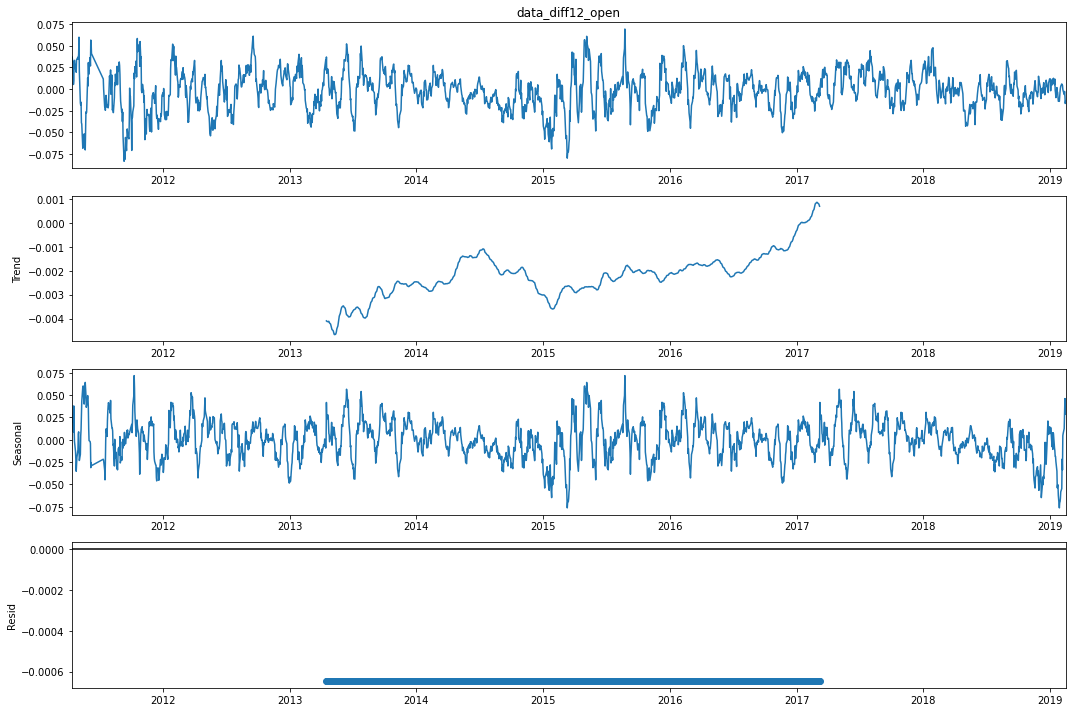

<Figure size 1080x720 with 0 Axes>

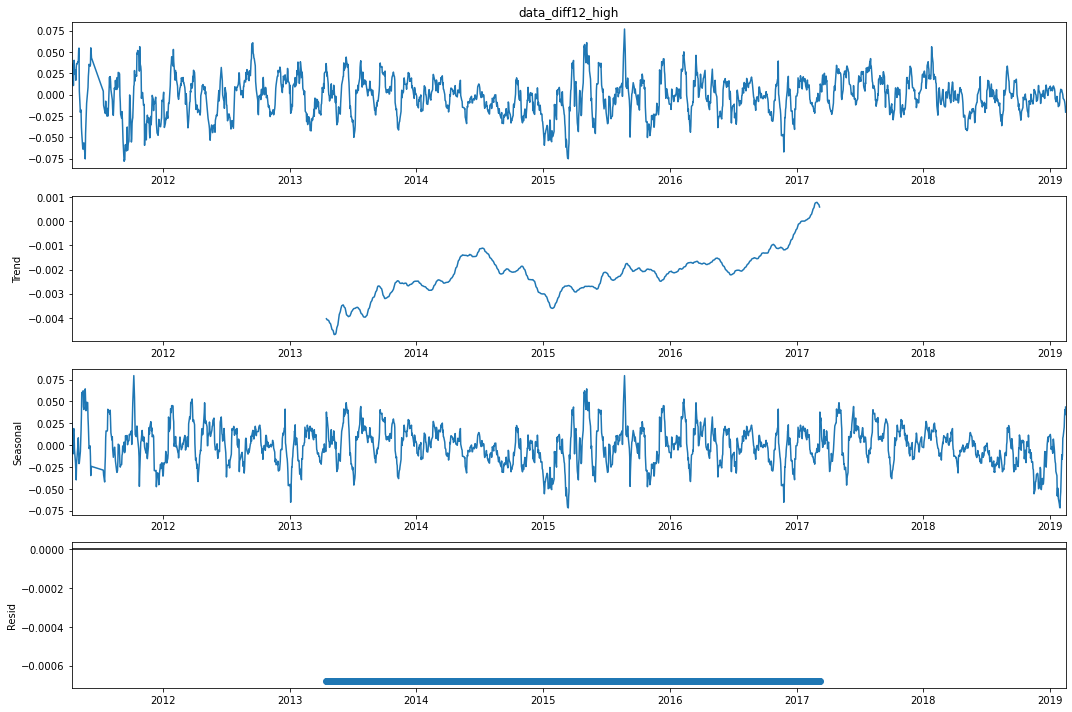

<Figure size 1080x720 with 0 Axes>

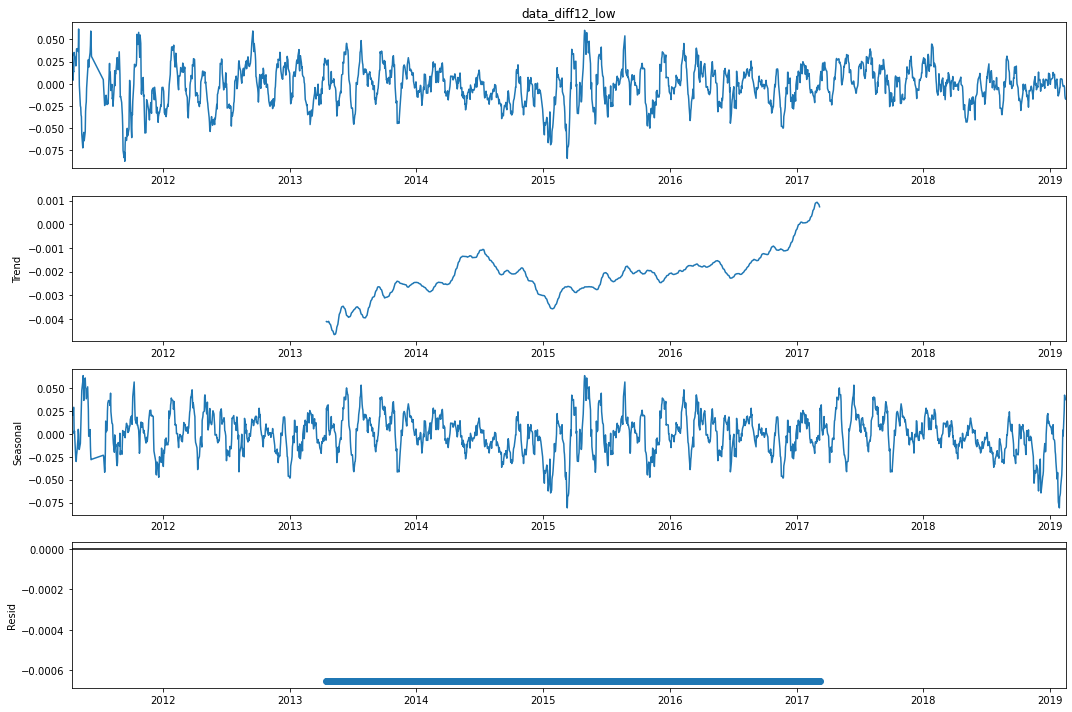

<Figure size 1080x720 with 0 Axes>

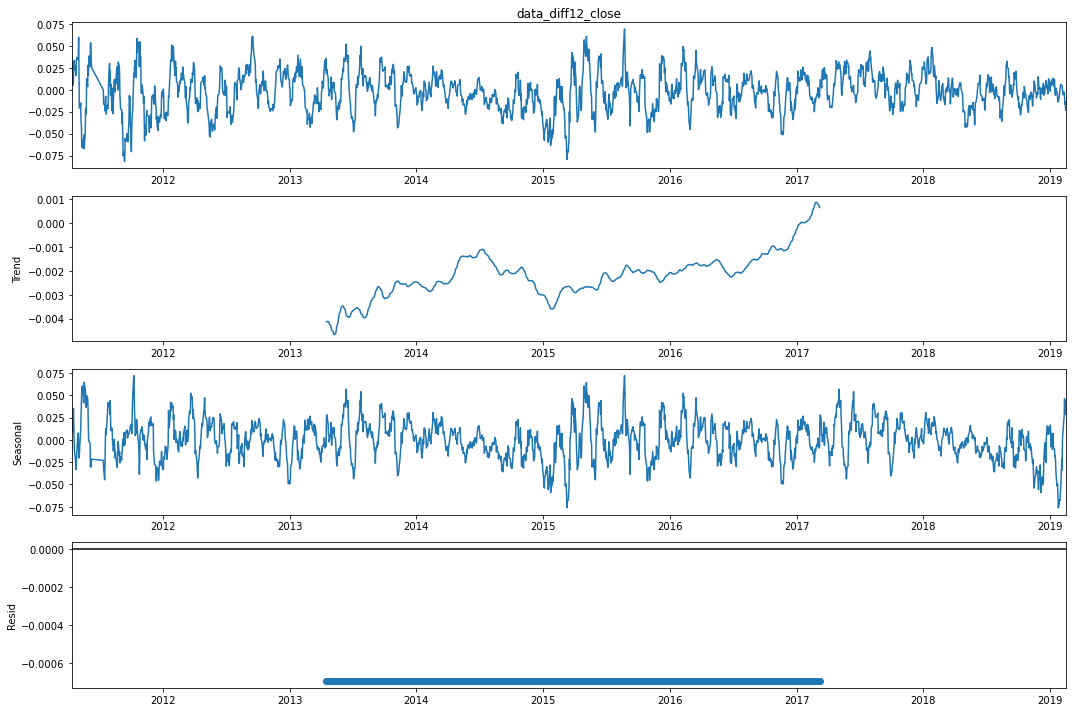

<Figure size 1080x720 with 0 Axes>

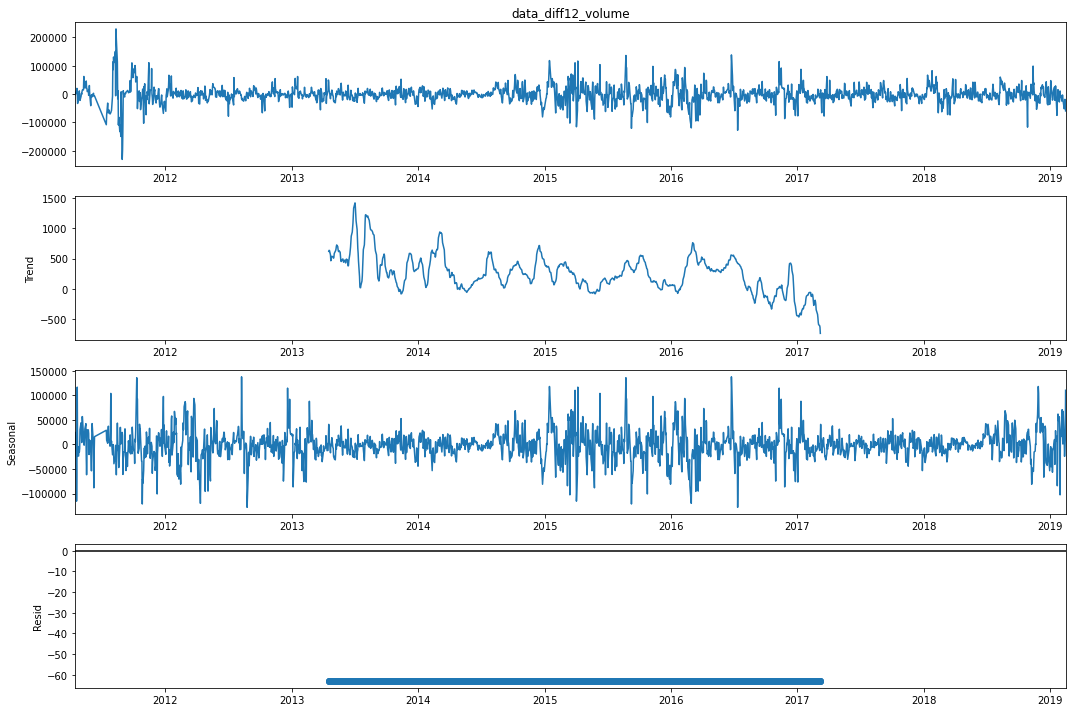

In [8]:
for column in df.columns:
    #if str(column) == 'volume':
    #    continue
    #print("Now working with", str(column))
    df['data_diff12_'+ str(column)] = df[str(column)] - df[str(column)].shift(12)
    plt.figure(figsize(15,10))
    #plt.title(str(column))
    sm.tsa.seasonal_decompose(df['data_diff12_'+str(column)][12:], period = 1018).plot()
    #print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff12_'+str(column)][12:])[1])

на единичку

<Figure size 1080x720 with 0 Axes>

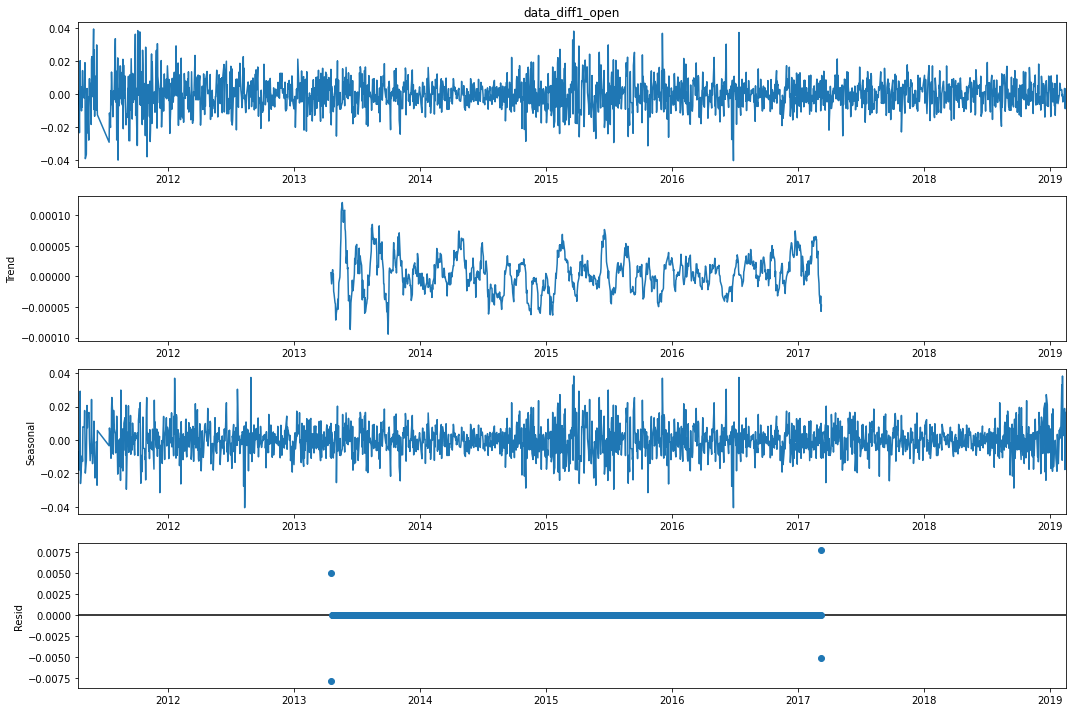

<Figure size 1080x720 with 0 Axes>

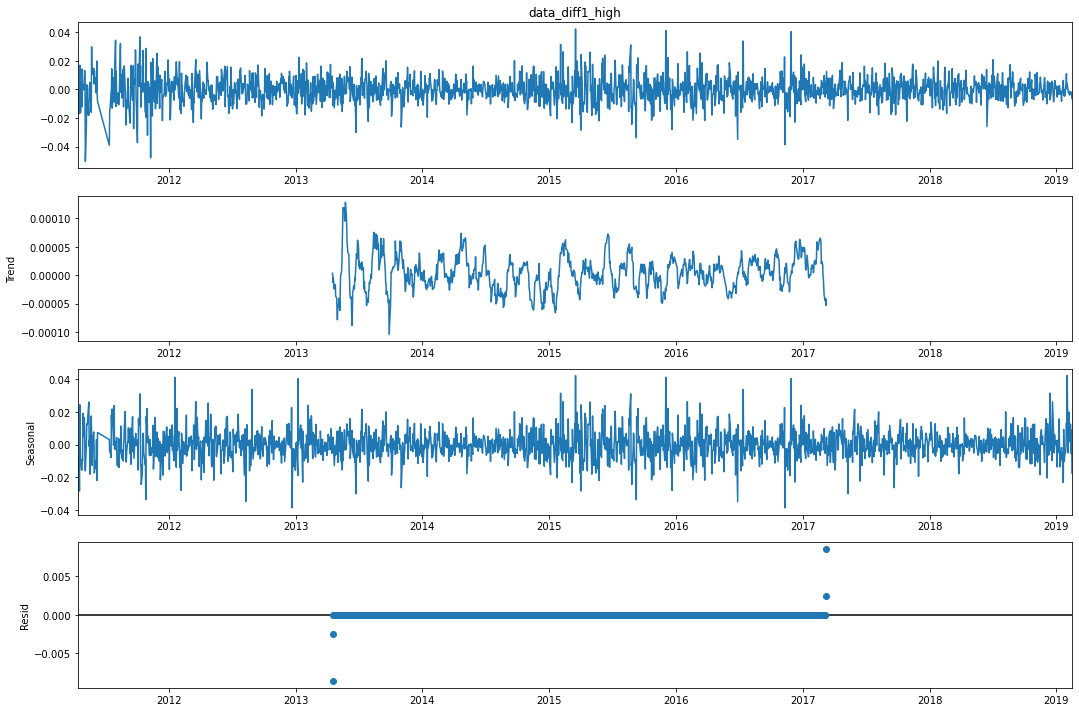

<Figure size 1080x720 with 0 Axes>

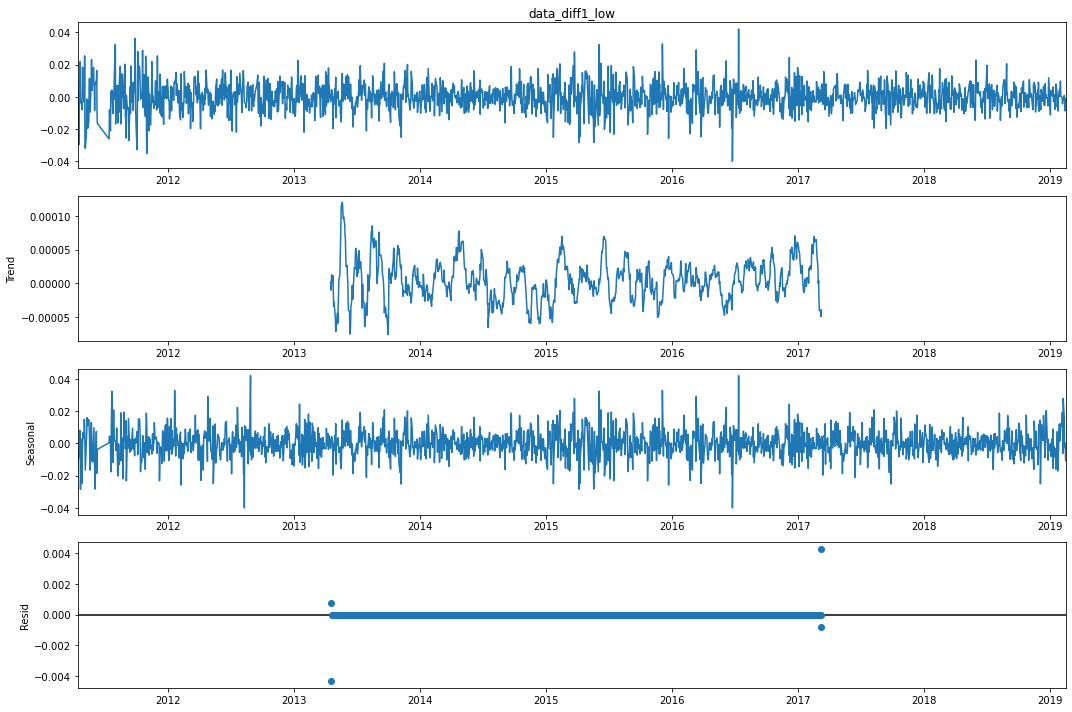

<Figure size 1080x720 with 0 Axes>

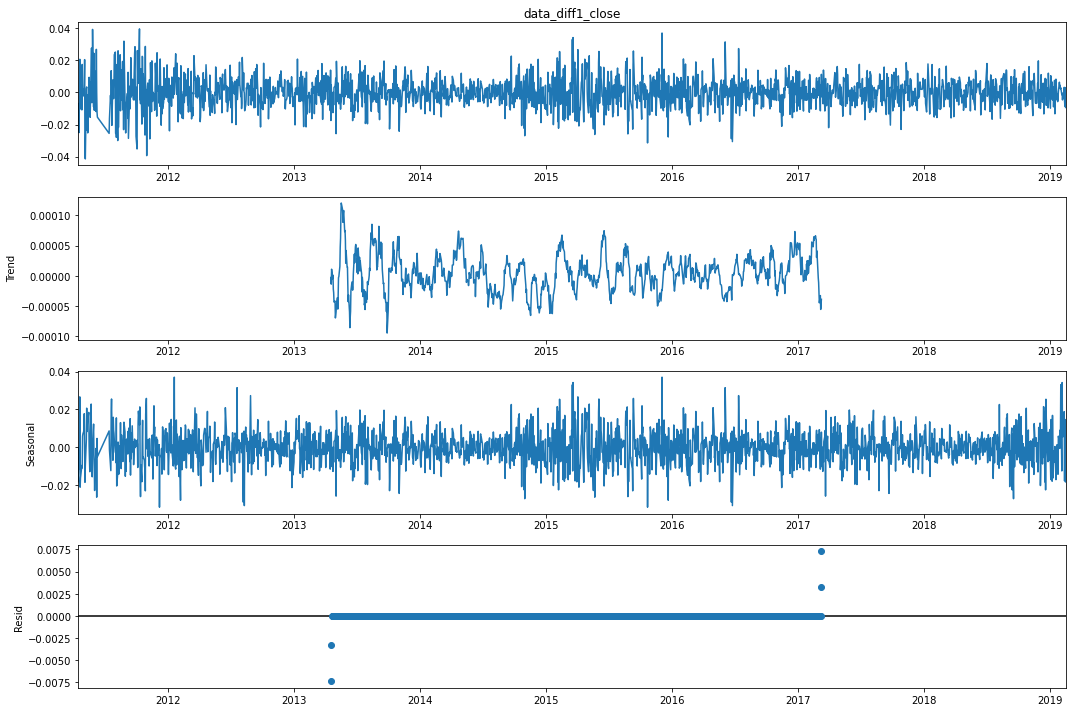

<Figure size 1080x720 with 0 Axes>

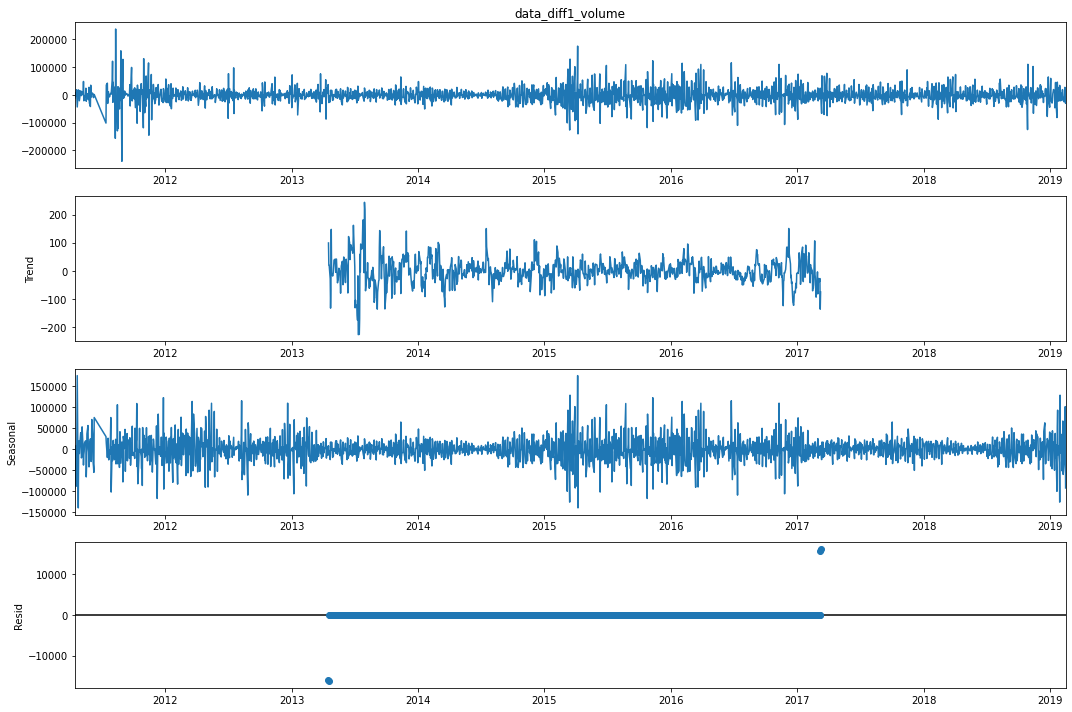

In [9]:
for column in columns_list:
    df['data_diff1_'+ str(column)] = df['data_diff12_'+ str(column)] - df['data_diff12_'+ str(column)].shift(1)
    plt.figure(figsize(15,10))
    sm.tsa.seasonal_decompose(df['data_diff1_'+ str(column)][13:],period = 1017).plot()
    #print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df['data_diff1'][13:])[1])

save it 

In [10]:
df.head()

,open,high,low,close,volume,data_diff12_open,data_diff12_high,data_diff12_low,data_diff12_close,data_diff12_volume,data_diff1_open,data_diff1_high,data_diff1_low,data_diff1_close,data_diff1_volume
date,,,,,,,,,,,,,,,
2011-03-29,1.4086,1.4148,1.4047,1.4113,64044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-30,1.4113,1.4146,1.4052,1.4126,70281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,1.4127,1.4232,1.4116,1.4174,73492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-01,1.4173,1.4245,1.4061,1.4234,70943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-04,1.4231,1.4268,1.4192,1.4218,61094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data = pd.DataFrame(data={'open' : df['data_diff1_open'][13:],
                    'high' : df['data_diff1_high'][13:],
                    'low' : df['data_diff1_low'][13:],
                    'close' : df['data_diff1_close'][13:],
                    'volume' : df['data_diff1_volume'][13:]},
                   index=df.index[13:])

In [12]:
data

,open,high,low,close,volume
date,,,,,
2011-04-15,0.00190,-0.00090,0.00200,-0.00700,-12600.0
2011-04-18,-0.00840,-0.01690,-0.02970,-0.02500,7772.0
2011-04-19,-0.02350,-0.00810,0.01030,0.00440,-2500.0
2011-04-20,0.00460,0.01690,-0.00080,0.02060,17753.0
2011-04-21,0.02030,0.01270,0.02180,0.00290,-9542.0
...,...,...,...,...,...
2019-02-11,-0.00410,-0.00178,0.00077,0.00315,-25901.0
2019-02-12,0.00343,-0.00165,-0.00204,-0.00549,6986.0
2019-02-13,-0.00500,-0.00244,-0.00878,-0.00859,26586.0


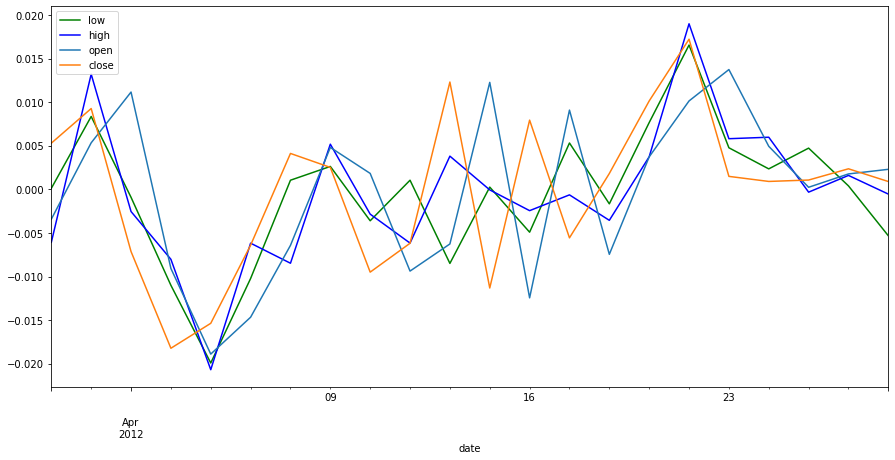

In [13]:
plt.figure(figsize(15,7))
data.loc['2012-03-29':'2012-04-29'].low.plot(color='g')
data.loc['2012-03-29':'2012-04-29'].high.plot(color='b')
data.loc['2012-03-29':'2012-04-29'].open.plot()
data.loc['2012-03-29':'2012-04-29'].close.plot()
plt.legend(loc='upper left')

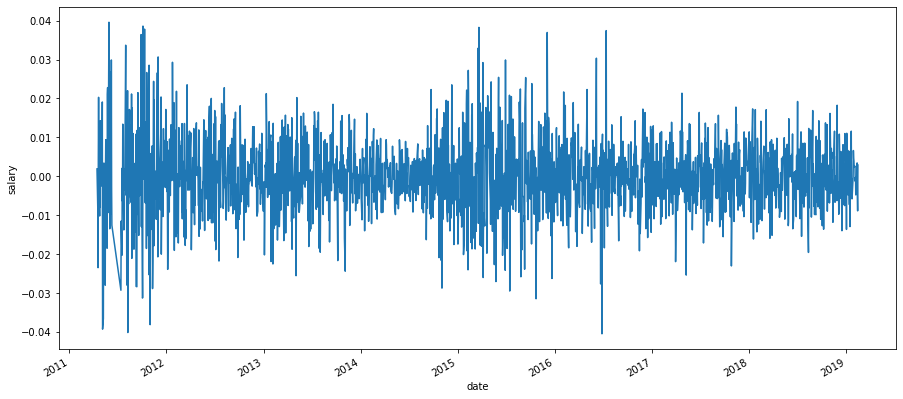

In [14]:
plt.figure(figsize(15,7))
data['open'].plot() 
plt.ylabel('salary')
pylab.show()

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

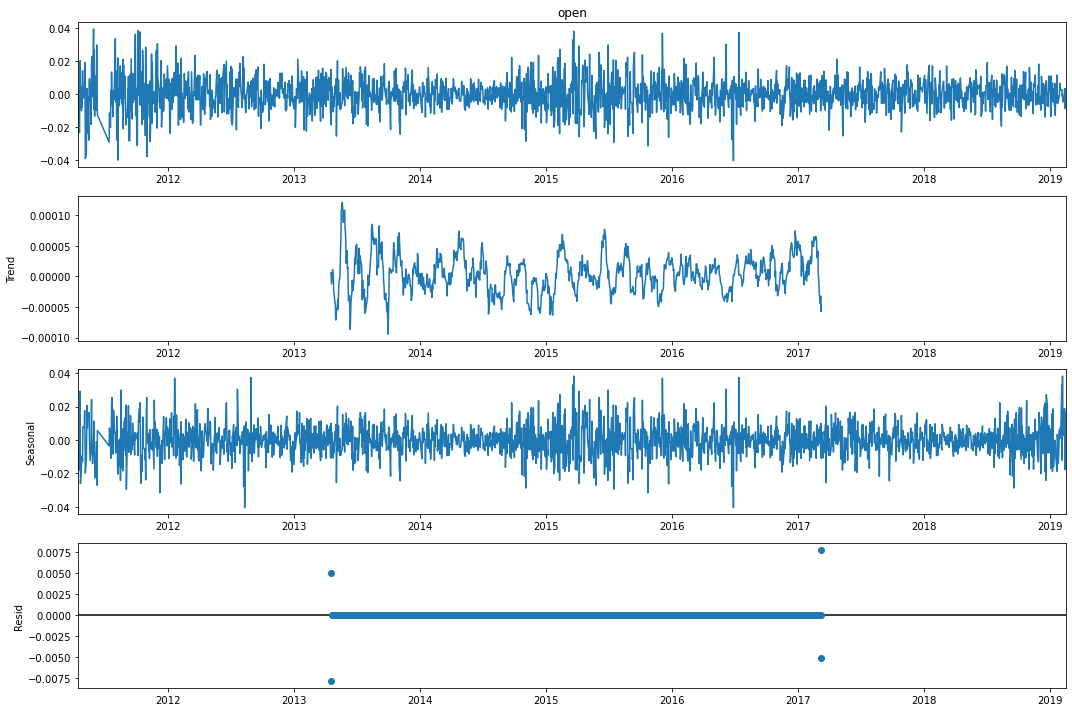

In [15]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(data.open,  period = 1017).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.open)[1])

In [16]:
#data.to_csv('data.csv')